In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image as im
import cv2 
from skimage.draw import polygon

In [2]:
#Normalizes any given array from range [a,b] to an array with range [c,d], where a<b and c<d. It is assumed that the domain of the input array lies in [a,b].
def normalizer(array, a, b, c, d): 
    result = (1/(b-a))*((d-c)*array + (b*c - a*d))
    result[result<c] = c #Clip lower values to c
    result[result>d] = d #Clip lower values to d
    return result

def circle_aperture(D, N=256):
    x = np.linspace(-1,1,num = N)
    y= np.linspace(-1,1,num=N)
    x= y
    radius = (D*2)/2
    X,Y = np.meshgrid(x,y)
    R = np.sqrt(X**2 + Y**2) #Setup a circle, centered at the origin.
    A = np.zeros(np.shape(R)) 
    A[np.where(R<radius)] = 1.0 
    return A

In [3]:
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\github\Part 1 Fourier Transform Model of Image Formation\Pictures\\' 
pic1 = path + 'mr incredible.jfif' 
pic2 = path + 'NIP.tif'
pic3= path +'jwst.tif'
mr_incredible = cv2.imread(pic1,0)

# Understanding 2D FFT

[]

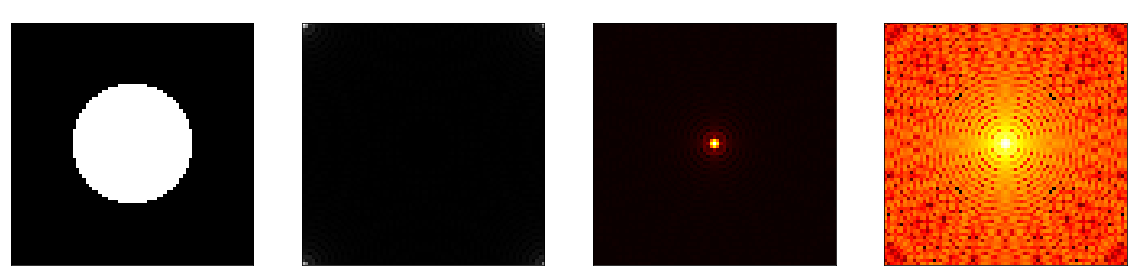

In [4]:
N = 75 #the higher, the finer. Lower the number to better see the patterns.
x = np.linspace(-1,1,num = N)
y= np.linspace(-1,1,num=N)
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2) #Setup a circle, centered at the origin.
A = np.zeros(np.shape(R)) 
A[np.where(R<0.5)] = 1.0 #Circle of radius 0.5

#2D FFT of the circle
FA = np.fft.fft2(A) 
abs_FA = abs(FA)


#display as a white circle in 2D coordinates
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(A, cmap='gray') 
ax[0].set_title('Image', color='white')
ax[1].imshow(abs_FA, cmap='gray') 
ax[1].set_title('2D FFT', color='white')

#Zero-center the 2D FFT
FAshifted = np.fft.fftshift(FA) 
ax[2].imshow(abs(FAshifted), cmap='hot') 
ax[2].set_title('Zero-centered 2D FFT', color='white')

ax[3].imshow(np.log(abs(FAshifted)), cmap='hot')
ax[3].set_title('Zero-centered log 2D FFT', color='white')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].set_xticks([])
ax[3].set_yticks([])

[]

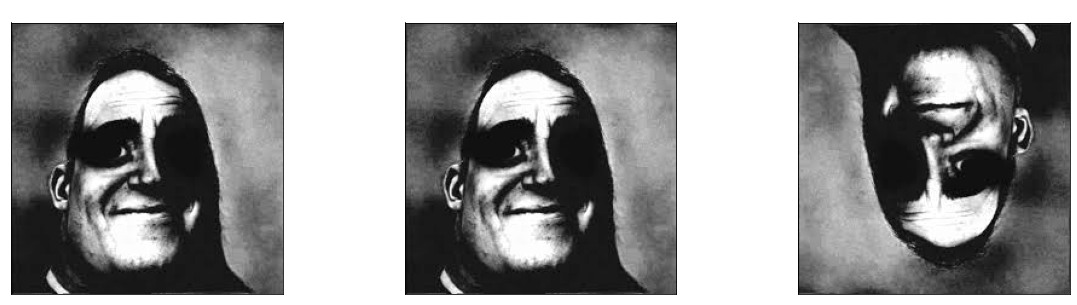

In [5]:
fig, ax = plt.subplots(1,3,figsize=(20,5)) 
ax[0].imshow(mr_incredible, cmap='gray') 
ax[0].set_title('Original', color='white')


#Reconstruct the image from the FFT using ifft2 (inverse FFT)
rec= np.fft.ifft2(np.fft.fft2(mr_incredible))

ax[1].imshow(abs(rec), cmap='gray')
ax[1].set_title('Reconstruction (ifft2)', color='white')

#Reconstruct image by applying fft2 twice
FA = np.fft.fft2(mr_incredible) 
rec1 = np.fft.fft2(FA)
ax[2].imshow(abs(rec1), cmap='gray') 
ax[2].set_title('Reconstruction (two fft2)', color='white')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])



# Simulating an Imaging System by Convolution
and other extra stuff

[]

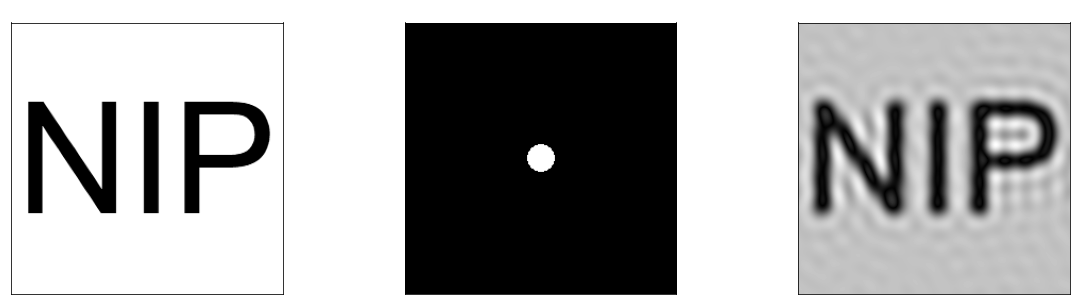

In [6]:
NIP = cv2.imread(pic2, 0)
aperture = np.fft.fftshift(circle_aperture(D=0.1)) 
conv = np.fft.fft2(NIP)*aperture 
deconv = np.fft.ifft2(conv) 
NIP_fft = np.fft.fftshift(np.fft.fft2(NIP)) 

fig, ax = plt.subplots(1,3,figsize=(20,5)) 
ax[0].imshow(NIP, cmap='gray') 
ax[0].set_title('Original', color='white')
ax[1].imshow(circle_aperture(D=0.1), cmap='gray')
ax[1].set_title('Aperture', color='white') 
ax[2].imshow(abs(deconv), cmap='gray') 
ax[2].set_title('Convolved Image', color='white')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

[]

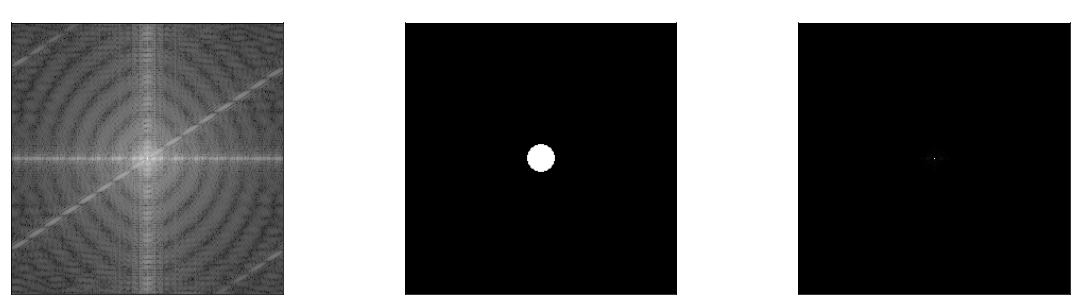

In [7]:
NIP_fft = np.fft.fftshift(np.fft.fft2(NIP)) 

fig, ax = plt.subplots(1,3,figsize=(20,5)) 
ax[0].imshow(np.log(abs(NIP_fft)), cmap='gray') 
ax[0].set_title('FFT of Original Image', color='white')
ax[1].imshow(circle_aperture(D=0.1), cmap='gray')
ax[1].set_title('Aperture', color='white') 
ax[2].imshow(np.fft.fftshift(abs(conv)), cmap='gray') 
ax[2].set_title('FFT of Convolved Image', color='white')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])


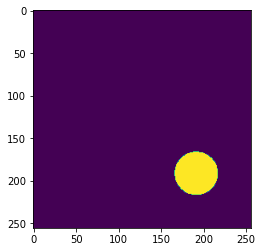

In [8]:
def circle_aperture_offcenter(D, N=256):
    x = np.linspace(-1,1,num = N)
    y= np.linspace(-1,1,num=N)
    x= y
    radius = (D*2)/2
    X,Y = np.meshgrid(x,y)
    R = np.sqrt((X-0.5)**2 + (Y-0.5)**2) #Setup an offcenter circle.
    A = np.zeros(np.shape(R)) 
    A[np.where(R<radius)] = 1.0 
    return A 

plt.imshow(circle_aperture_offcenter(0.2)) 

[]

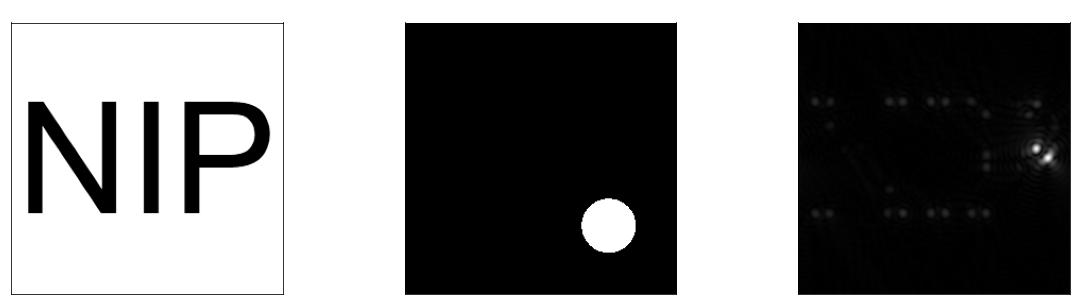

In [9]:
NIP = cv2.imread(pic2, 0)
aperture = np.fft.fftshift(circle_aperture_offcenter(D=0.2)) 
conv = np.fft.fft2(NIP)*aperture 
deconv = np.fft.ifft2(conv) 
NIP_fft = np.fft.fftshift(np.fft.fft2(NIP)) 

fig, ax = plt.subplots(1,3,figsize=(20,5)) 
ax[0].imshow(NIP, cmap='gray') 
ax[0].set_title('Original', color='white')
ax[1].imshow(circle_aperture_offcenter(D=0.2), cmap='gray')
ax[1].set_title('Aperture', color='white') 
ax[2].imshow(abs(deconv), cmap='gray') 
ax[2].set_title('Convolved Image', color='white')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

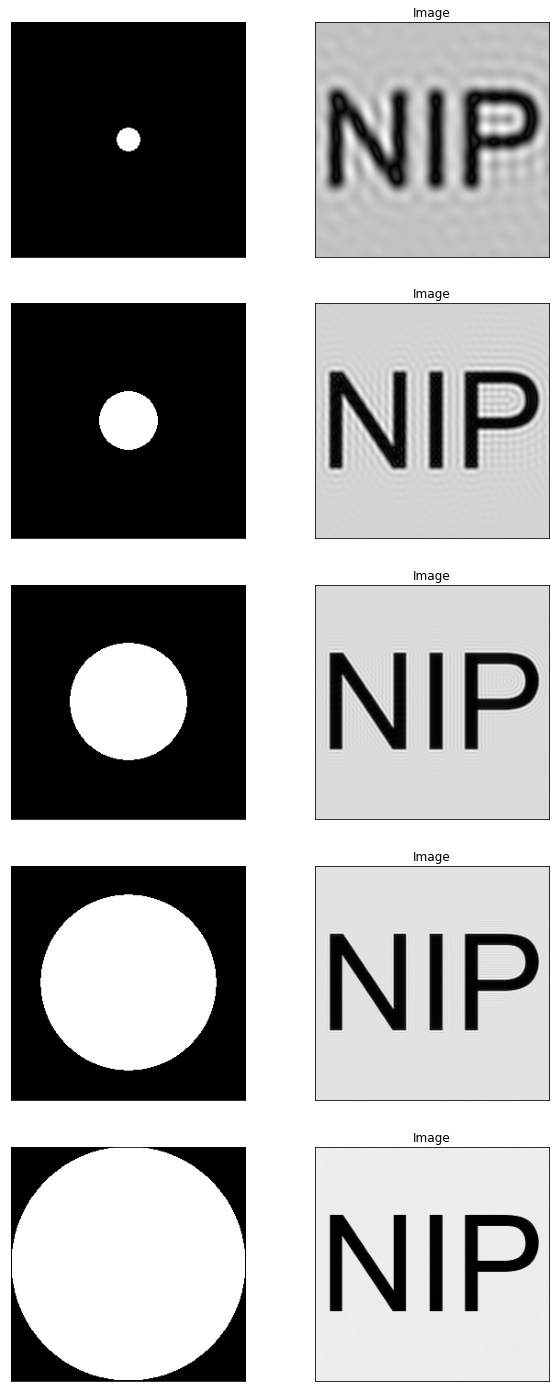

In [10]:
diams = [0.1, .25, .50, .75, 1]
fig, ax = plt.subplots(len(diams), 2, figsize=(10, 5*len(diams)))
ax = ax.flatten()
NIP_fft = np.fft.fft2(NIP)
for i in range(len(diams)): 
    circle = circle_aperture(N=np.shape(NIP)[0], D=diams[i])
    aperture = np.fft.fftshift(circle) 
    conv = NIP_fft*aperture 
    deconv = np.fft.ifft2(conv) 
    ax[2*i].imshow(circle, cmap='gray') 
    ax[2*i].set_title('{percent}% diameter'.format(percent=diams[i]*100), color='white')
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i+1].imshow(abs(deconv), cmap='gray')
    ax[2*i+1].set_title('Image')
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

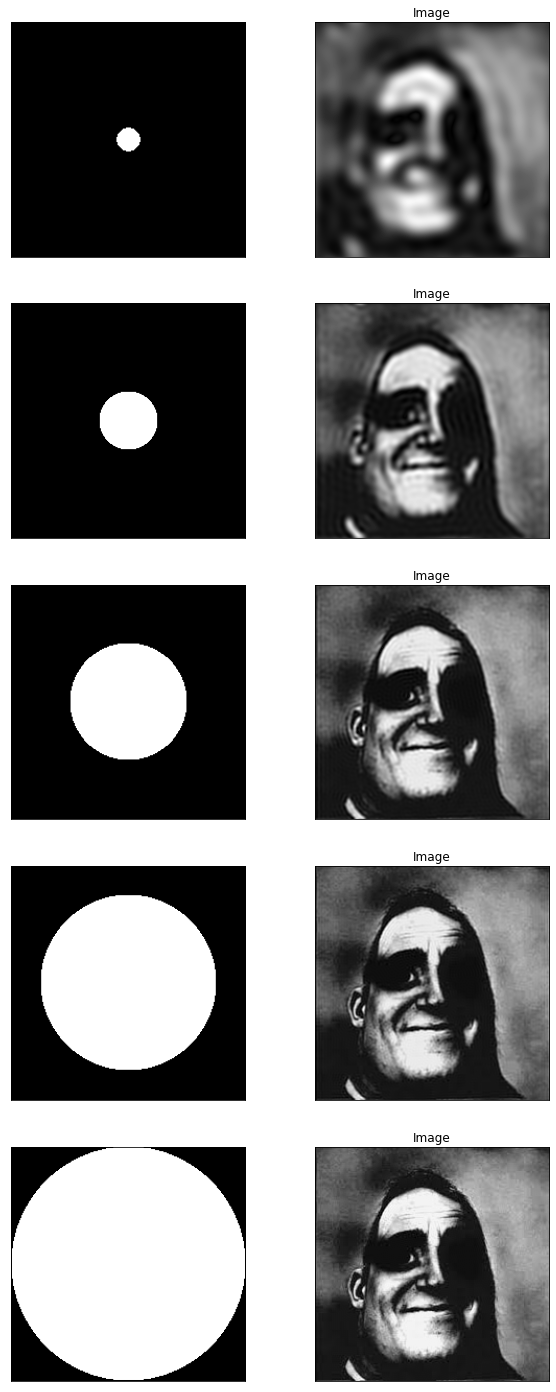

In [11]:
diams = [0.1, .25, .50, .75, 1]
fig, ax = plt.subplots(len(diams), 2, figsize=(10, 5*len(diams)))
ax = ax.flatten()
mrincredible_fft = np.fft.fft2(mr_incredible)
for i in range(len(diams)): 
    circle = circle_aperture(N=np.shape(mrincredible_fft)[0], D=diams[i])
    aperture = np.fft.fftshift(circle) 
    conv = mrincredible_fft*aperture 
    deconv = np.fft.ifft2(conv) 
    ax[2*i].imshow(circle, cmap='gray') 
    ax[2*i].set_title('{percent}%'.format(percent=diams[i]*100), color='white')
    ax[2*i+1].imshow(abs(deconv), cmap='gray')
    ax[2*i+1].set_title('Image')
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

[]

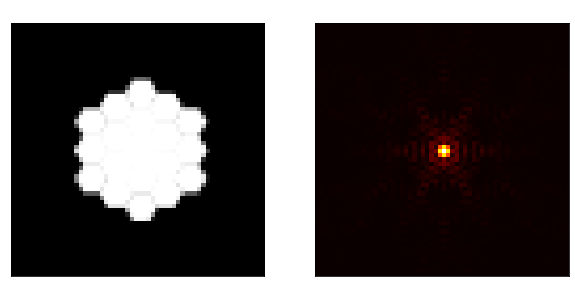

In [12]:
pic3= path +'jwst.tiff'
jwst = cv2.imread(pic3, 0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 
ax[0].imshow(jwst, cmap='gray') 
ax[0].set_title('Aperture', color='white') 
fft_jwst = np.fft.fftshift(np.fft.fft2(jwst))
ax[1].imshow(abs(fft_jwst), cmap='hot')
ax[1].set_title('Diffraction', color='white') 
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[0].set_xticks([])
ax[0].set_yticks([])

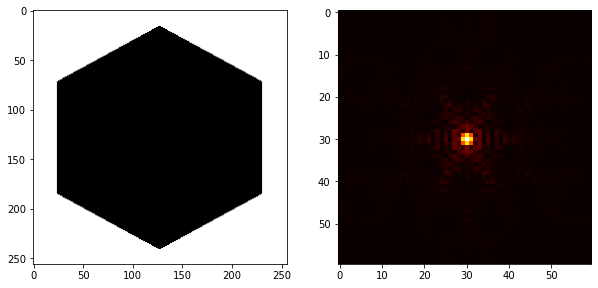

In [13]:
pic4 = path + 'hexagon.tif'
hex = cv2.imread(pic4, 0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 
ax[0].imshow(hex, cmap='gray') 
fft_hex = np.fft.fftshift(np.fft.fft2(hex))
ax[1].imshow(abs(fft_jwst), cmap='hot')  


In [14]:
def slit(slits=1, width = 0.05, N=256): 
    y = np.linspace(0,N, N+1) 
    x = y 
    X,Y = np.meshgrid(x,y) 
    vals = np.zeros((N,N))
    cen = np.array([(1/2, (i+1)/(slits+1)) for i in range(slits)]) 
    cen_trans = np.array(cen*N, dtype='int')
    for c in cen_trans: #code each slit 
        low_y = int(c[1] - np.round(width*N/2))
        high_y = int(c[1] + np.round(width*N/2))
        left_x = int(c[0] - np.round(N/4)) 
        right_x = int(c[0] + np.round(N/4)) 
        vals[left_x : right_x, low_y : high_y] = 1
    return vals 

1 Slit Amplitude:160.0
2 Slit Amplitude:320.0
3 Slit Amplitude:480.0
4 Slit Amplitude:640.0
5 Slit Amplitude:800.0
6 Slit Amplitude:960.0
7 Slit Amplitude:1120.0
8 Slit Amplitude:1280.0
9 Slit Amplitude:1440.0
10 Slit Amplitude:1600.0


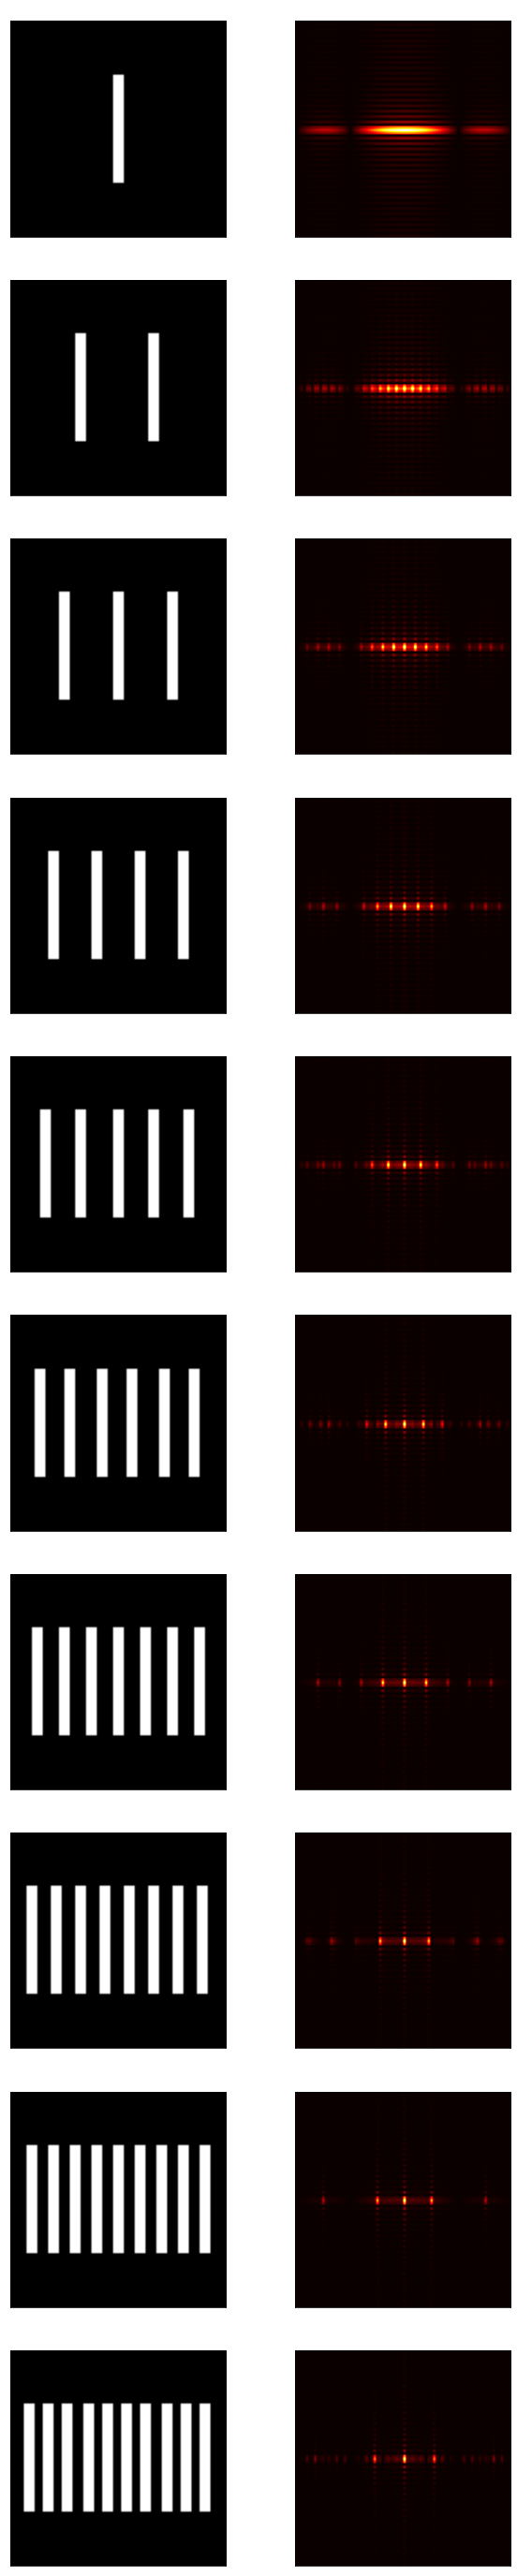

In [46]:
slits = [i+1 for i in range(10)]
fig, ax = plt.subplots(len(slits), 2, figsize=(10, 5*len(slits)))
ax = ax.flatten()
for i in range(len(slits)): 
    my_slit = slit(slits[i], width = 0.05, N=80) 
    fft_slit= np.fft.fftshift(np.fft.fft2(my_slit))
    abs_fftslit = abs(fft_slit)
    print(str(i+1)+' Slit Amplitude:' + str(np.max(abs_fftslit)))
    ax[2*i].imshow(my_slit, cmap='gray') 
    ax[2*i].set_title('{s} Slits'.format(s=slits[i]), color='white')
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i+1].imshow(abs_fftslit, cmap='hot')
    ax[2*i+1].set_title('Diffraction', color='white')
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

In [16]:
def vertices(sides, r):
    vertices = np.array([[r*np.cos(2*np.pi*i/sides), r*np.sin(2*np.pi*i/sides)] for i in range(sides+1)])
    return vertices 

def polygon_aperture(sides, r, N=200):
    img = np.zeros((N,N)) 
    v = np.array(vertices(sides, r)*N, dtype='int') + int(N/2) 
    rr, cc = polygon(v[:,0], v[:,1], img.shape)
    img[rr,cc] = 1 
    return img 


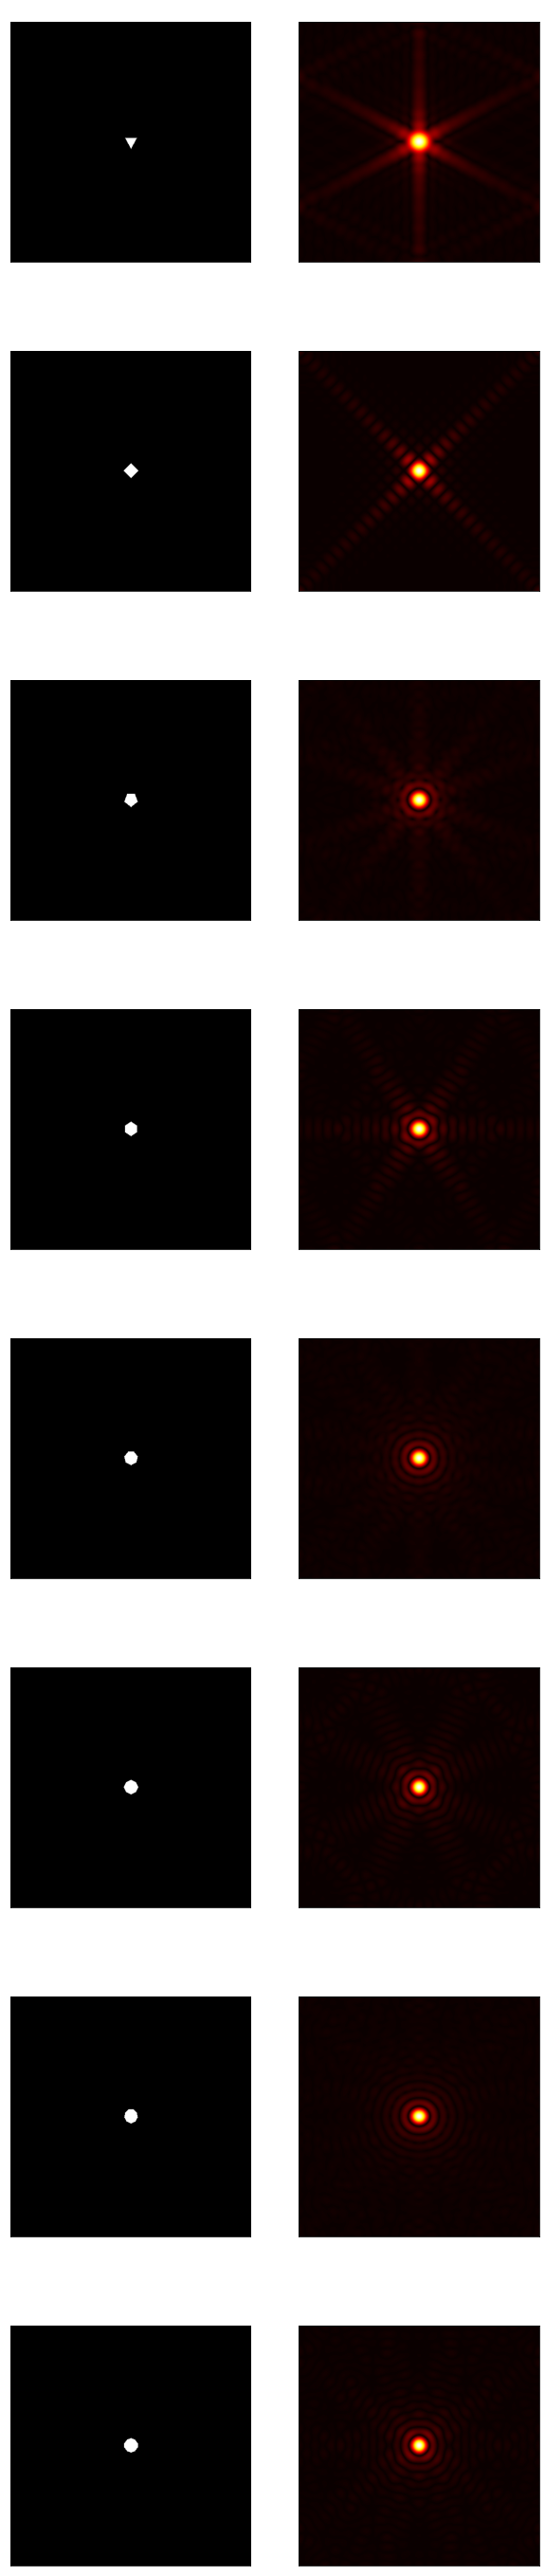

In [17]:
ngons = [i+3 for i in range(8)]
fig, ax = plt.subplots(len(ngons), 2, figsize=(10, 5*len(slits)))
ax = ax.flatten()
for i in range(len(ngons)): 
    my_ngon = polygon_aperture(i+3, r=0.03, N=500) 
    fft_ngon= np.fft.fftshift(np.fft.fft2(my_ngon))
    ax[2*i].imshow(my_ngon, cmap='gray') 
    ax[2*i].set_title('{n}-gon'.format(n=ngons[i]), color='white')
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i+1].imshow(abs(fft_ngon), cmap='hot')
    ax[2*i+1].set_title('Diffraction', color='white') 
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

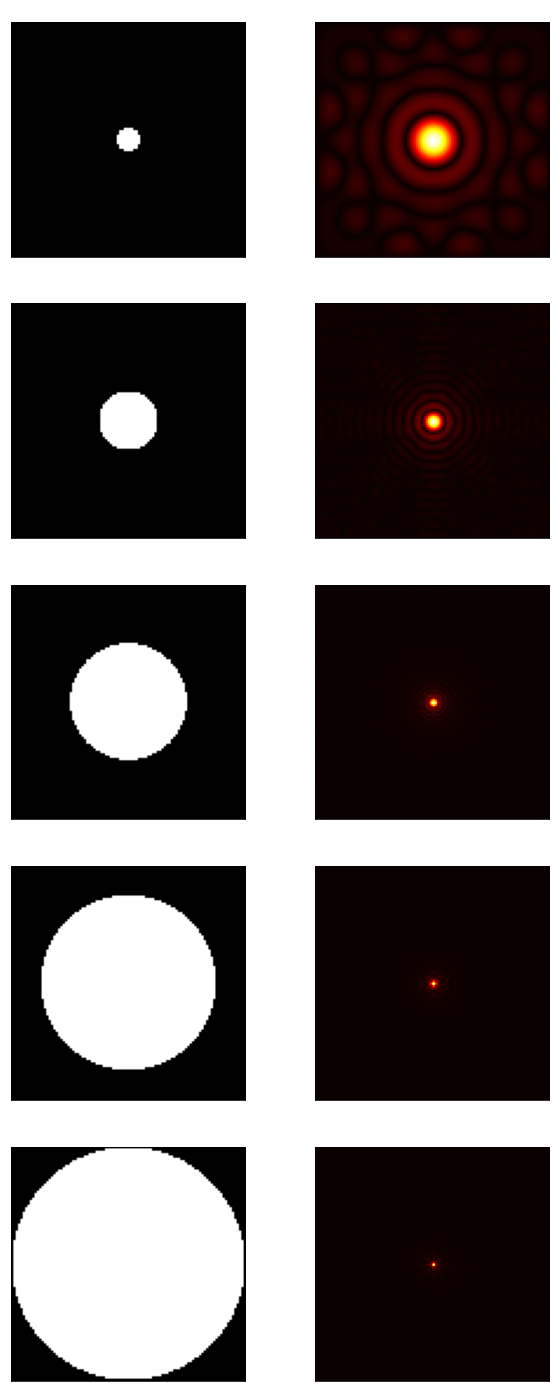

In [18]:
diams = [0.1, .25, .50, .75, 1]
fig, ax = plt.subplots(len(diams), 2, figsize=(10, 5*len(diams)))
ax = ax.flatten()
for i in range(len(diams)): 
    circle = circle_aperture(N=100, D=diams[i])
    circle_fft = np.fft.fftshift(np.fft.fft2(circle))
    ax[2*i].imshow(circle, cmap='gray') 
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i].set_title('{percent}% diameter'.format(percent=diams[i]*100), color='white')
    ax[2*i+1].imshow(abs(circle_fft), cmap='hot')
    ax[2*i+1].set_title('Image', color='white') 
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

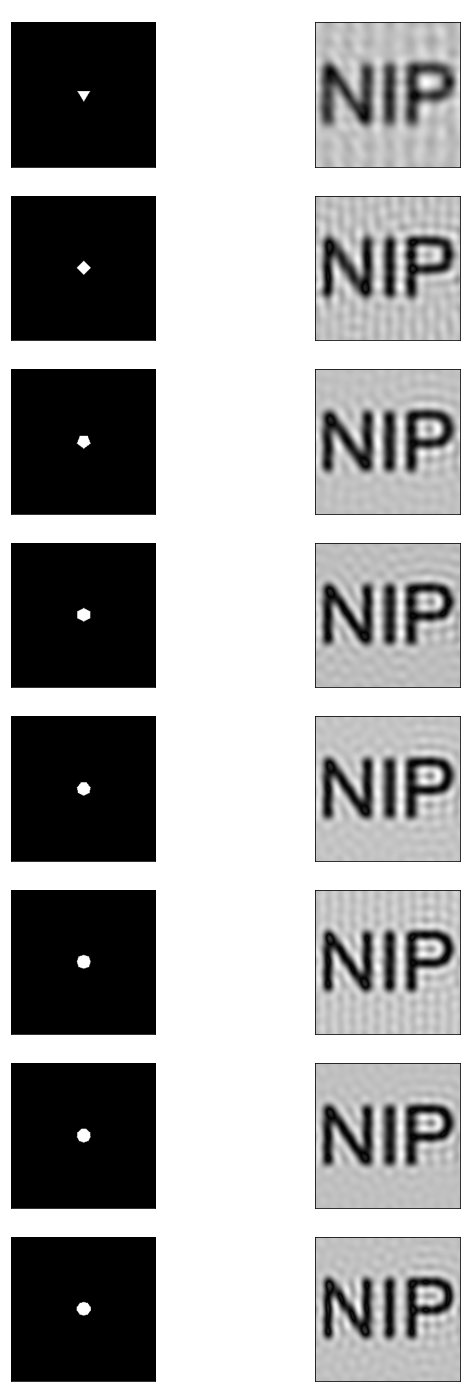

In [20]:
ngons = [i+3 for i in range(8)]
fig, ax = plt.subplots(len(ngons), 2, figsize=(10, 5*len(diams)))
ax = ax.flatten()
NIP_fft = np.fft.fft2(NIP)
for i in range(len(ngons)): 
    polygon_ap = polygon_aperture(sides=ngons[i], r=0.05, N=np.shape(NIP_fft)[0])
    aperture = np.fft.fftshift(polygon_ap) 
    conv = NIP_fft*aperture 
    deconv = np.fft.ifft2(conv) 
    ax[2*i].imshow(polygon_ap, cmap='gray') 
    ax[2*i].set_title('{n}-gon '.format(n=ngons[i]), color='white')
    ax[2*i+1].imshow(abs(deconv), cmap='gray')
    ax[2*i+1].set_title('Image', color='white')
    ax[2*i].set_xticks([])
    ax[2*i].set_yticks([])
    ax[2*i+1].set_xticks([])
    ax[2*i+1].set_yticks([])

# Template Matching

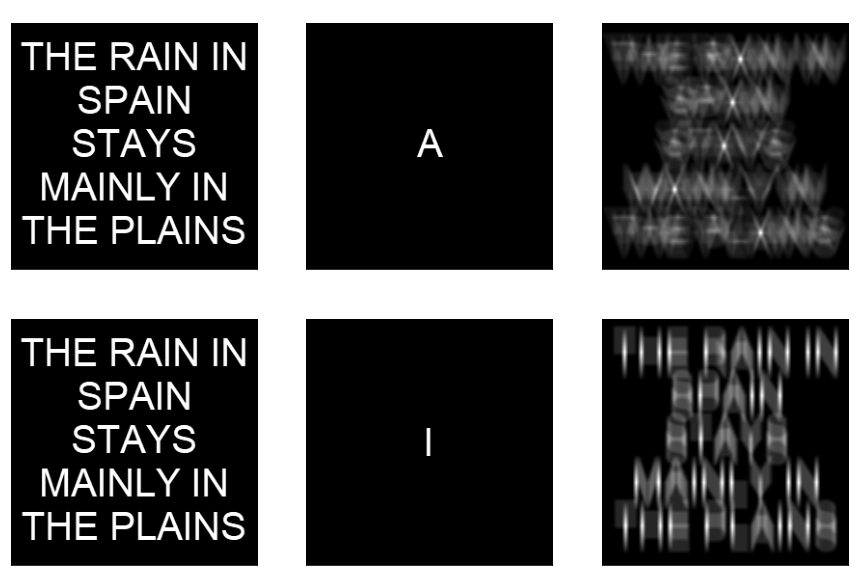

In [40]:
def template_match(image, pattern): #template match version where AFFT (pattern) is conjugated.
    AFFT = np.conj(np.fft.fft2(pattern))
    FImg = np.fft.fft2(image)
    P = FImg*AFFT
    smallp = np.fft.fftshift(np.fft.ifft2(P))
    return abs(smallp)

def template_matchv2(image, pattern): #template match version where FImg (image) is conjugated.
    AFFT = np.fft.fft2(pattern)
    FImg = np.conj(np.fft.fft2(image))
    P = FImg*AFFT
    smallp = np.fft.fftshift(np.fft.ifft2(P)) 
    return abs(smallp)

def template_matchv3(image, pattern): #experimental template match version where none of the FImg and AFFT are conjugated.
    AFFT = np.fft.fft2(pattern)
    FImg = np.fft.fft2(image)
    P = FImg*AFFT
    smallp = np.fft.fftshift(np.fft.ifft2(P)) 
    return abs(smallp)

def template_matchv4(image, pattern): #experimental template match version where none of the FImg and AFFT are conjugated.
    AFFT = np.conj(np.fft.fft2(pattern))
    FImg = np.conj(np.fft.fft2(image))
    P = FImg*AFFT
    smallp = np.fft.fftshift(np.fft.ifft2(P)) 
    return abs(smallp)

template_a = path + 'A.tif'
template_i = path + 'I.tif'
p = path + 'sentence.tif'
A = cv2.imread(template_a, 0) 
I = cv2.imread(template_i, 0)
phrase = cv2.imread(p, 0)

fig, ax = plt.subplots(2,3, figsize=(15,10)) 
ax = ax.flatten()
patterns = [A,I]
for i in range(2):
    ax[3*i].imshow(phrase, cmap='gray')
    ax[3*i].set_title('Image', color='white')
    ax[3*i + 1].imshow(patterns[i], cmap='gray')
    ax[3*i + 1].set_title('Pattern', color='white')
    ax[3*i + 2].imshow(template_match(phrase, patterns[i]), cmap='gray')
    ax[3*i + 2].set_title('Template Match v1: conj pattern', color='white')
    ax[3*i].set_xticks([])
    ax[3*i].set_yticks([]) 
    ax[3*i+1].set_xticks([])
    ax[3*i+1].set_yticks([])
    ax[3*i+2].set_xticks([])
    ax[3*i+2].set_yticks([])

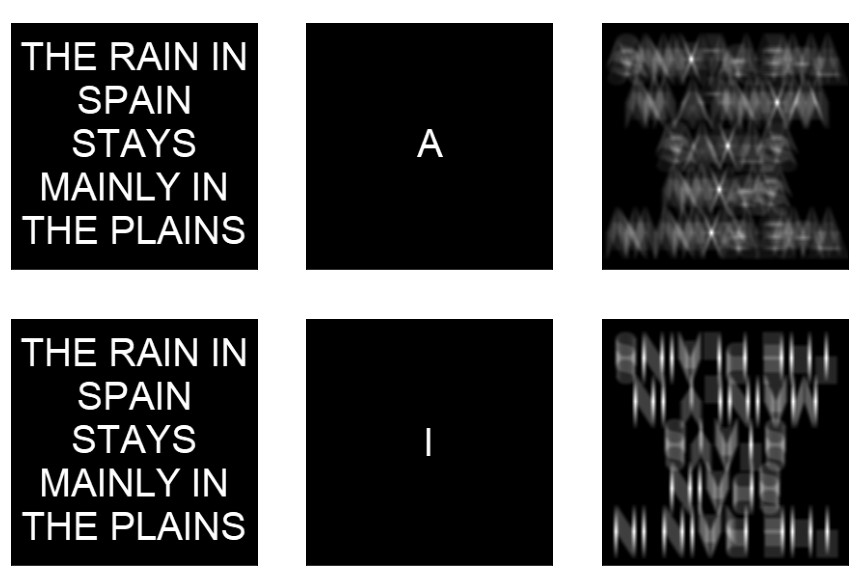

In [43]:
fig, ax = plt.subplots(2,3, figsize=(15,10)) 
ax = ax.flatten()
patterns = [A,I]
for i in range(2):
    ax[3*i].imshow(phrase, cmap='gray')
    ax[3*i].set_title('Image', color='white')
    ax[3*i + 1].imshow(patterns[i], cmap='gray')
    ax[3*i + 1].set_title('Pattern', color='white')
    ax[3*i + 2].imshow(template_matchv2(phrase, patterns[i]), cmap='gray')
    ax[3*i + 2].set_title('Template Match v2: conj image', color='white')
    ax[3*i].set_xticks([])
    ax[3*i].set_yticks([]) 
    ax[3*i+1].set_xticks([])
    ax[3*i+1].set_yticks([])
    ax[3*i+2].set_xticks([])
    ax[3*i+2].set_yticks([])

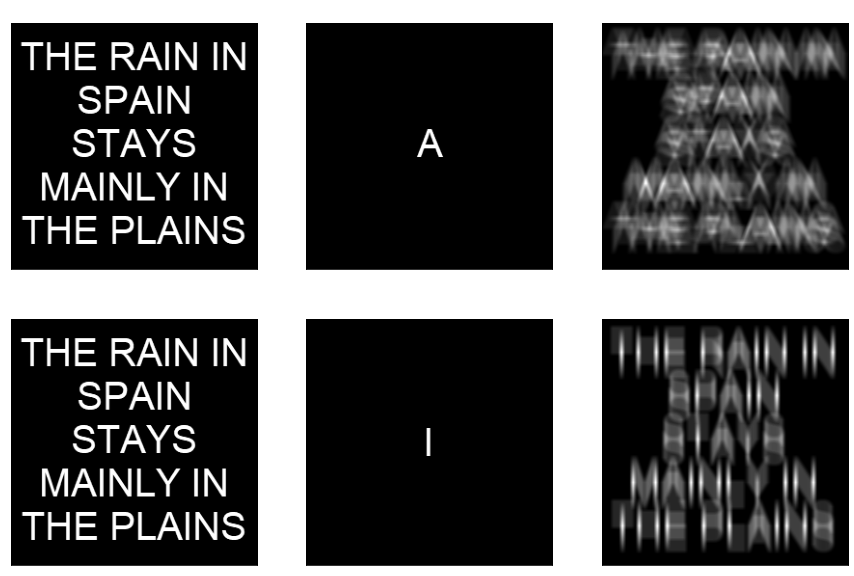

In [44]:
template_a = path + 'A.tif'
template_i = path + 'I.tif'
p = path + 'sentence.tif'
A = cv2.imread(template_a, 0) 
I = cv2.imread(template_i, 0)
phrase = cv2.imread(p, 0)

fig, ax = plt.subplots(2,3, figsize=(15,10)) 
ax = ax.flatten()
patterns = [A,I]
for i in range(2):
    ax[3*i].imshow(phrase, cmap='gray')
    ax[3*i].set_title('Image', color='white')
    ax[3*i + 1].imshow(patterns[i], cmap='gray')
    ax[3*i + 1].set_title('Pattern', color='white')
    ax[3*i + 2].imshow(template_matchv3(phrase, patterns[i]), cmap='gray')
    ax[3*i + 2].set_title('Template Match v3: no conj', color='white')
    ax[3*i].set_xticks([])
    ax[3*i].set_yticks([]) 
    ax[3*i+1].set_xticks([])
    ax[3*i+1].set_yticks([])
    ax[3*i+2].set_xticks([])
    ax[3*i+2].set_yticks([])

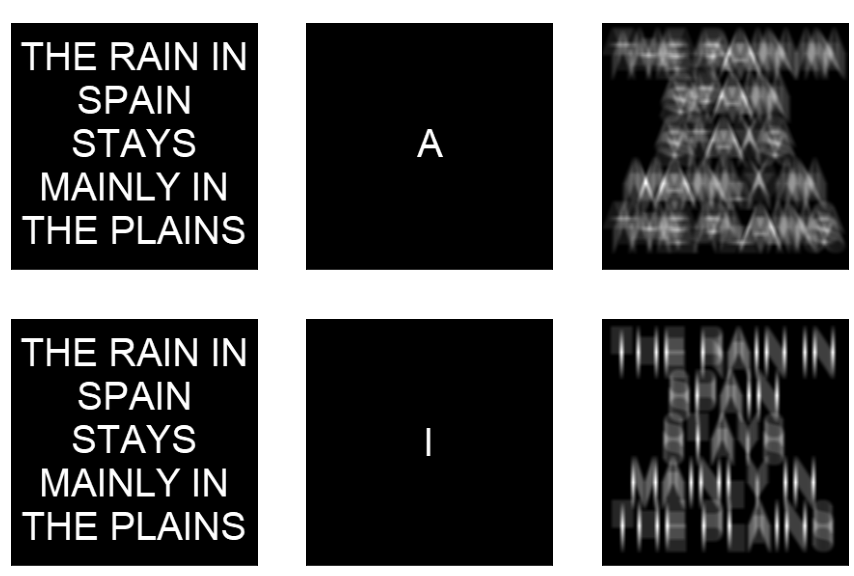

In [45]:
fig, ax = plt.subplots(2,3, figsize=(15,10)) 
ax = ax.flatten()
patterns = [A,I]
for i in range(2):
    ax[3*i].imshow(phrase, cmap='gray')
    ax[3*i].set_title('Image', color='white')
    ax[3*i + 1].imshow(patterns[i], cmap='gray')
    ax[3*i + 1].set_title('Pattern', color='white')
    ax[3*i + 2].imshow(template_matchv3(phrase, patterns[i]), cmap='gray')
    ax[3*i + 2].set_title('Template Match v4: both conjugated', color='white')
    ax[3*i].set_xticks([])
    ax[3*i].set_yticks([]) 
    ax[3*i+1].set_xticks([])
    ax[3*i+1].set_yticks([])
    ax[3*i+2].set_xticks([])
    ax[3*i+2].set_yticks([])

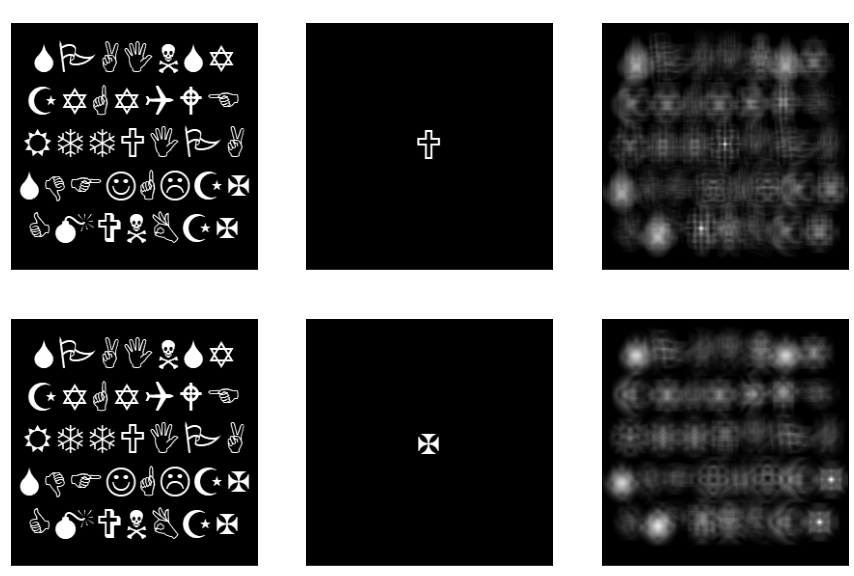

In [22]:
template_0 = path + 'cross.tif'
template_1 = path + 'wingding_pattern1.tif'
p = path + 'wingdings.tif'
cross = cv2.imread(template_0, 0) 
templar = cv2.imread(template_1, 0) 
glyphs = cv2.imread(p, 0)

fig, ax = plt.subplots(2,3, figsize=(15,10)) 
ax = ax.flatten()
patterns = [cross,templar]
for i in range(2):
    ax[3*i].imshow(glyphs, cmap='gray')
    ax[3*i].set_title('Image', color='white')
    ax[3*i + 1].imshow(patterns[i], cmap='gray')
    ax[3*i + 1].set_title('Pattern', color='white')
    ax[3*i + 2].imshow(template_match(glyphs, patterns[i]), cmap='gray')
    ax[3*i + 2].set_title('Template Match', color='white')
    ax[3*i].set_xticks([])
    ax[3*i].set_yticks([]) 
    ax[3*i+1].set_xticks([])
    ax[3*i+1].set_yticks([])
    ax[3*i+2].set_xticks([])
    ax[3*i+2].set_yticks([])